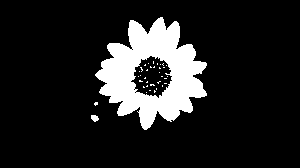

In [94]:
import cv2
from google.colab.patches import cv2_imshow

# Cargar imagen y convertir a escala de grises
imagen = cv2.imread('/content/flour.jpeg')

gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Binarizar la imagen
_, binarizada = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY)

# Display the binary image
cv2_imshow(binarizada)

# You no longer need cv2.waitKey(0) or cv2.destroyAllWindows()

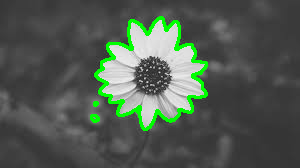

In [95]:


# Encontrar contornos
contornos, jerarquia = cv2.findContours(binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos sobre la imagen original
imagen_con_contornos = imagen.copy()
cv2.drawContours(imagen_con_contornos, contornos, -1, (0, 255, 0), 2)

# Mostrar la imagen con contornos en Colab
cv2_imshow(imagen_con_contornos)


Figura A: Área = 30.50, Perímetro = 21.90, Centroide = (94, 117)
Figura B: Área = 6.50, Perímetro = 10.24, Centroide = (95, 103)
Figura C: Área = 7422.50, Perímetro = 568.74, Centroide = (151, 73)


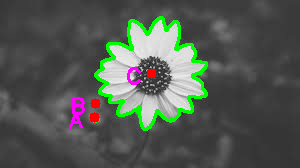

In [105]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Assuming 'binarizada' is your binary image

# Detectar contornos
contornos, jerarquia = cv2.findContours(binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copiar imagen para mostrar resultados
imagen_con_resultados = imagen.copy()  # Assuming 'imagen' is your original image

# Letras para etiquetar
etiquetas = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Procesar cada contorno
for i, contorno in enumerate(contornos):
    if i >= len(etiquetas):
        break  # Evitar exceder el alfabeto
    letra = etiquetas[i]

    # Calcular centroide
    M = cv2.moments(contorno)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Área y perímetro
    area = cv2.contourArea(contorno)
    perimetro = cv2.arcLength(contorno, True)

    # Imprimir métricas en consola
    print(f"Figura {letra}: Área = {area:.2f}, Perímetro = {perimetro:.2f}, Centroide = ({cx}, {cy})")

    # Etiquetar con una letra
    cv2.putText(imagen_con_resultados, letra, (cx - 25, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 255), 2)

    # Dibujar contorno en verde
    cv2.drawContours(imagen_con_resultados, [contorno], -1, (0, 255, 0), 2)

    # Dibujar centroide en rojo
    cv2.circle(imagen_con_resultados, (cx, cy), 5, (0, 0, 255), -1)

# Mostrar la imagen con etiquetas
cv2_imshow(imagen_con_resultados)

la libreria solo encuentra contornos  con colores blancos y fondo negro 1ro hay q invertir la imagen y luego pasarle el procedimiesnto

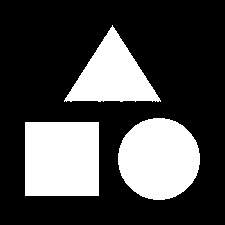

Figura A: Cuadrado, Área = 5329.00, Perímetro = 292.00, Centroide = (61, 158)
Figura B: circulo, Área = 5157.00, Perímetro = 267.76, Centroide = (158, 158)
Figura C: Triángulo, Área = 3593.00, Perímetro = 296.05, Centroide = (112, 75)


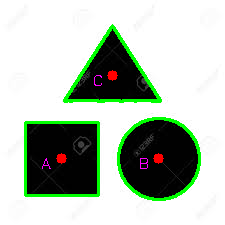

In [117]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Cargar imagen y convertir a escala de grises
imagen = cv2.imread('/content/figure.jpeg')

gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Binarizar la imagen
_, binarizada = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY)
binarizada = cv2.bitwise_not(binarizada)  # Invert the image

# Display the binary image
cv2_imshow(binarizada)

# Detectar contornos
contornos, jerarquia = cv2.findContours(binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copiar imagen para mostrar resultados
imagen_con_resultados = imagen.copy()

# Letras para etiquetar
etiquetas = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Procesar cada contorno
for i, contorno in enumerate(contornos):
    if i >= len(etiquetas):
        break  # Evitar exceder el alfabeto
    letra = etiquetas[i]

    # Calcular centroide
    M = cv2.moments(contorno)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Área y perímetro
    area = cv2.contourArea(contorno)
    perimetro = cv2.arcLength(contorno, True)

    # Aproximar el contorno a un polígono
    epsilon = 0.04 * perimetro
    aproximacion = cv2.approxPolyDP(contorno, epsilon, True)
    vertices = len(aproximacion)

    # Clasificar la figura
    if vertices == 3:
        figura = "Triángulo"
    elif vertices == 4:
        figura = "Cuadrado"  # Podría ser un cuadrado o un rectángulo
    else:
        figura = "circulo"

    # Imprimir métricas en consola
    print(f"Figura {letra}: {figura}, Área = {area:.2f}, Perímetro = {perimetro:.2f}, Centroide = ({cx}, {cy})")

    # Etiquetar con una letra y la figura
    texto = f"{letra}"
    cv2.putText(imagen_con_resultados, texto, (cx - 20, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 1)

    # Dibujar contorno en verde
    cv2.drawContours(imagen_con_resultados, [contorno], -1, (0, 255, 0), 2)

    # Dibujar centroide en rojo
    cv2.circle(imagen_con_resultados, (cx, cy), 5, (0, 0, 255), -1)

# Mostrar la imagen con etiquetas
cv2_imshow(imagen_con_resultados)

se uso GPT https://chatgpt.com/share/68116038-b044-8004-98c9-b7a6f51d1afd